2025-03-30 09:59:09.947799: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Memory growth enabled for PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Anndata successfully constructed.
Anndata object counts are now normalized.
The total length of the genes list or feature set is: 2000.
Epoch 0, Avg Outcome Loss: 0.6976, Train AUC: 0.4981, Train Accuracy: 0.4518, Test AUC: 0.4952, Test Accuracy: 0.4520
Epoch 10, Avg Outcome Loss: 0.5652, Train AUC: 0.8830, Train Accuracy: 0.8118, Test AUC: 0.8669, Test Accuracy: 0.8025
Epoch 20, Avg Outcome Loss: 0.4283, Train AUC: 0.9166, Train Accuracy: 0.8382, Test AUC: 0.8955, Test Accuracy: 0.8386
Epoch 30, Avg Outcome Loss: 0.3548, Train AUC: 0.9416, Train Accuracy: 0.8688, Test AUC: 0.9115, Test Accuracy: 0.8443
Epoch 40, Avg Outcome Loss: 0.2897, Train AUC: 0.9569, Train Accuracy: 0.8883, Test AUC: 0.9188, Test Accuracy: 0.8528
Epoch 50, Avg Outcome Loss: 0.2494, Train AUC: 0.9723, Train Accuracy: 0.9147, Test AUC: 0.9252, Test Accuracy: 0.8585
Epoch 60, Avg Outcome Loss: 0.1913, Train AUC: 0.9847, Train

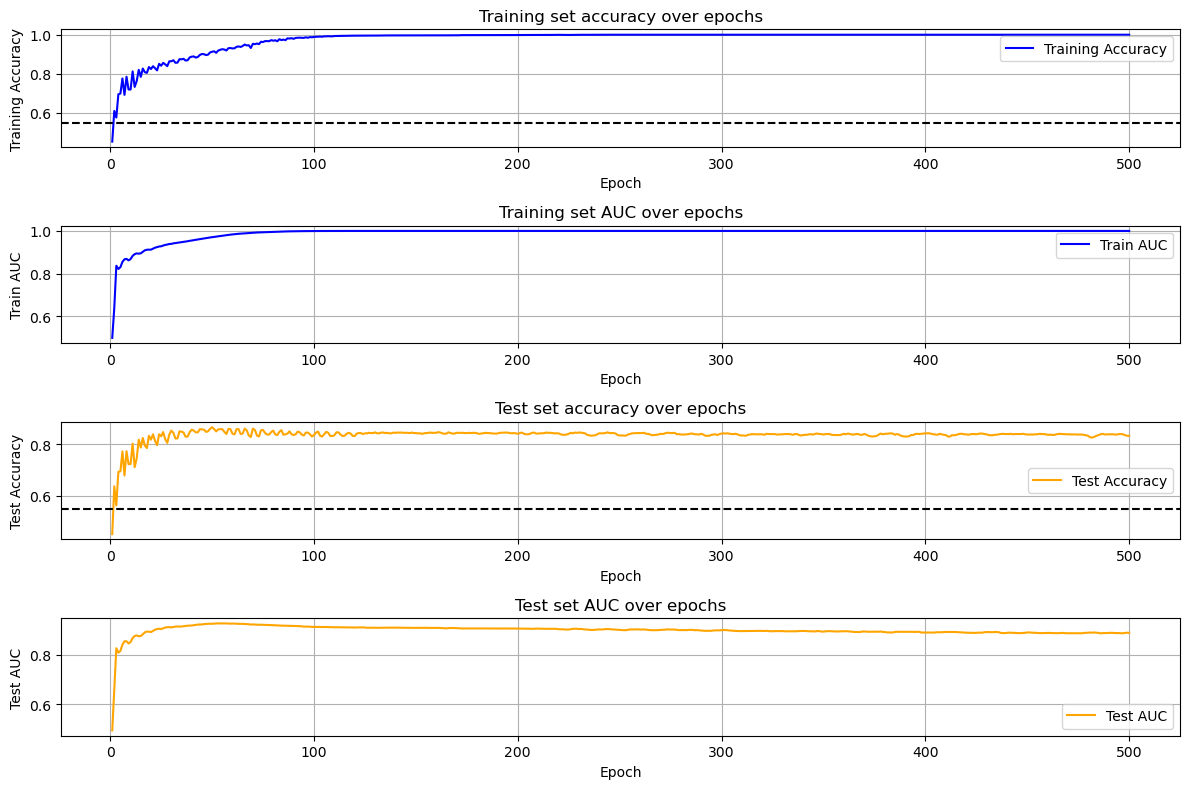

In [1]:
from PAGEpy import PAGEpy_plot
from PAGEpy import pso
from PAGEpy.format_data_class import FormatData
from PAGEpy.pred_ann_model import PredAnnModel
import pickle
import pandas as pd
from PAGEpy import PAGEpy_utils

#memory growth is enabled for for the gpu
PAGEpy_utils.init_cuda()

# HVGs are selected by default, as opposed to the differential expression 
current_data = FormatData(data_dir = '/your/dir/with_single_cell_data_dir/', gene_selection = 'HVG', pval_correction = 'benjamini-hochberg', hvg_count = 2000)

# the selected genes can be loaded from the local directory, however, they are also an attribte of the FormatData object
genes_path = '/your/dir/feature_set.pkl'

with open(genes_path, 'rb') as f:
    current_genes = pickle.load(f)

# train the model
old_model = PredAnnModel(current_data,current_genes,num_epochs=500,auc_threshold=1)

# evaluate the model
PAGEpy_plot.evaluate_model(old_model, current_data)

In [ ]:
# the pso algorithm can be use to optimze the solution
best_solution, best_fitness = pso.binary_pso(current_genes, current_data, 200, 15,  C1 = 2, C2 = 1.5)

Current mixed precision policy: <Policy "mixed_float16">
Total time for generation 1: 11042.28 seconds
Generation 1: Best AUC = 0.944, Avg = 0.93908


Total time for generation 2: 11188.35 seconds
Generation 2: Best AUC = 0.944, Avg = 0.938


Total time for generation 3: 11202.86 seconds
Generation 3: Best AUC = 0.946, Avg = 0.94




In [ ]:
# the results of pso optimizatoin can be monitored
pso_df = pd.read_pickle("pso_df.pkl")
pso_dict = pd.read_pickle("pso_dict.pkl")

PAGEpy_plot.plot_pso_row_averages(pso_df)
PAGEpy_plot.plot_hamming_distance(pso_dict)
PAGEpy_plot.plot_sorted_frequencies(pso_dict, pso_df)

In [ ]:
# the optimised solution is saved locally, however, the returned varible from the binary_pso function can also be passed to the model (see below)                                             
# pso_genes = [item for item, m in zip(current_genes, best_solution) if m == 1]

# othervise just load the locally stored result file

# Load the saved genes list
with open('pso_genes_result.pkl', 'rb') as f:
    pso_genes = pickle.load(f)

In [ ]:
# now use this gene list to train a new model, which you can then evaluate
new_model = PredAnnModel(current_data,pso_genes,num_epochs=500)
PAGEpy_plot.evaluate_model(new_model, current_data)